In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

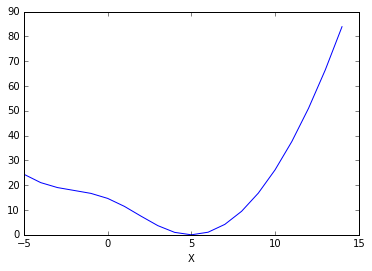

In [57]:
# r = np.arange(0.4, 30, 0.1)
P_t = 0
c = 299792458
f = 2.4 * 10**9

def P_r(r):
    P_r = P_t + 20 * np.log10(c / (4* np.pi* f* r))
    return P_r




def chi_squared(S_x, S_y, x, y, noise=0):
    chi = 0
    sigma = 1
    
    

    Z = 2 # height of router - height of device
    routers = [(0,0), (0,20), (20,20), (20, 0)]
    for (x_i, y_i) in routers:
        if noise:
            mu = 0
            sigma = noise
            package_noise = np.random.normal(mu, 0.1, 1)
        else:
            package_noise = 0
        S_r = math.sqrt((S_x - x_i)**2 + (S_y - y_i)**2 + Z**2)

        S_i = P_r(S_r) + package_noise
        r = math.sqrt((x - x_i)**2 + (y - y_i)**2 + Z**2)
        chi += ((P_r(r) - S_i)**2)/sigma**2
    return chi
    
y = 5
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(5,5,x, y))
    
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

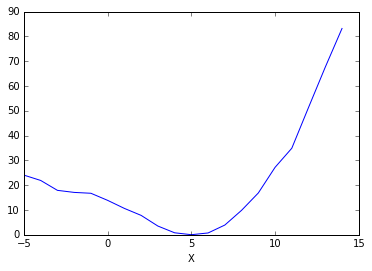

In [63]:
y = 5
chis = []
noise = 1
for x in range(-5, 15):
    chis.append(chi_squared(5,5,x, y, noise))
    
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

In [80]:
from scipy.optimize import minimize

noise = 1

def chi_squared_xy(xy):
    x,y = xy
    print(x)
    return chi_squared(5,5,x, y, noise)

x0 = [5, 5]
res = minimize(chi_squared_xy, x0)
print( res.x )

TypeError: unsupported operand type(s) for *: 'float' and 'function'